## Creating a dataframe views with two columns: datetime and user by reading feed-views.log

In [19]:
import pandas as pd

views = pd.read_csv(
    '../../datasets/feed-views.log',
    engine='python',
    sep='\t',
    names=['datetime', 'user'],
)
views

,datetime,user
0,2020-04-17 12:01:08.463179,artem
1,2020-04-17 12:01:23.743946,artem
2,2020-04-17 12:27:30.646665,artem
3,2020-04-17 12:35:44.884757,artem
4,2020-04-17 12:35:52.735016,artem
...,...,...
1071,2020-05-21 18:45:20.441142,valentina
1072,2020-05-21 23:03:06.457819,maxim
1073,2020-05-21 23:23:49.995349,pavel
1074,2020-05-21 23:49:22.386789,artem


### Convert datetime to datetime64[ns] and create new columns year, month, day, etc

In [20]:
views.datetime = pd.to_datetime(views.datetime)
views['year'] = views.datetime.dt.year
views['month'] = views.datetime.dt.month
views['day'] = views.datetime.dt.day
views['hour'] = views.datetime.dt.hour
views['minute'] = views.datetime.dt.minute
views['second'] = views.datetime.dt.second
views

,datetime,user,year,month,day,hour,minute,second
0,2020-04-17 12:01:08.463179,artem,2020,4,17,12,1,8
1,2020-04-17 12:01:23.743946,artem,2020,4,17,12,1,23
2,2020-04-17 12:27:30.646665,artem,2020,4,17,12,27,30
3,2020-04-17 12:35:44.884757,artem,2020,4,17,12,35,44
4,2020-04-17 12:35:52.735016,artem,2020,4,17,12,35,52
...,...,...,...,...,...,...,...,...
1071,2020-05-21 18:45:20.441142,valentina,2020,5,21,18,45,20
1072,2020-05-21 23:03:06.457819,maxim,2020,5,21,23,3,6
1073,2020-05-21 23:23:49.995349,pavel,2020,5,21,23,23,49
1074,2020-05-21 23:49:22.386789,artem,2020,5,21,23,49,22


## Create the new column daytime

In [21]:
views['daytime'] = pd.cut(
    views['hour'],
    [0.00, 3.59, 6.59, 10.59, 16.59, 19.59, 23.59],
    labels=['night', 'early morning', 'morning',
            'afternoon', 'early evening', 'evening'],
    right=False
)

views.index = views['user']
views

,datetime,user,year,month,day,hour,minute,second,daytime
user,,,,,,,,,
artem,2020-04-17 12:01:08.463179,artem,2020,4,17,12,1,8,afternoon
artem,2020-04-17 12:01:23.743946,artem,2020,4,17,12,1,23,afternoon
artem,2020-04-17 12:27:30.646665,artem,2020,4,17,12,27,30,afternoon
artem,2020-04-17 12:35:44.884757,artem,2020,4,17,12,35,44,afternoon
artem,2020-04-17 12:35:52.735016,artem,2020,4,17,12,35,52,afternoon
...,...,...,...,...,...,...,...,...,...
valentina,2020-05-21 18:45:20.441142,valentina,2020,5,21,18,45,20,early evening
maxim,2020-05-21 23:03:06.457819,maxim,2020,5,21,23,3,6,evening
pavel,2020-05-21 23:23:49.995349,pavel,2020,5,21,23,23,49,evening


## Counting elements

In [22]:
views.count()

datetime    1076
user        1076
year        1076
month       1076
day         1076
hour        1076
minute      1076
second      1076
daytime     1076
dtype: int64

In [23]:
views.value_counts('daytime')

daytime
evening          509
afternoon        252
early evening    145
night            129
morning           36
early morning      5
Name: count, dtype: int64

## Sorting df

In [24]:
views.sort_values(by=['hour', 'minute', 'second'], inplace=True)
views

,datetime,user,year,month,day,hour,minute,second,daytime
user,,,,,,,,,
valentina,2020-05-15 00:00:13.222265,valentina,2020,5,15,0,0,13,night
valentina,2020-05-15 00:01:05.153738,valentina,2020,5,15,0,1,5,night
pavel,2020-05-12 00:01:27.764025,pavel,2020,5,12,0,1,27,night
pavel,2020-05-12 00:01:38.444917,pavel,2020,5,12,0,1,38,night
pavel,2020-05-12 00:01:55.395042,pavel,2020,5,12,0,1,55,night
...,...,...,...,...,...,...,...,...,...
artem,2020-05-21 23:49:22.386789,artem,2020,5,21,23,49,22,evening
anatoliy,2020-05-09 23:53:55.599821,anatoliy,2020,5,9,23,53,55,evening
pavel,2020-05-09 23:54:54.260791,pavel,2020,5,9,23,54,54,evening


## Calculate the minimum and maximum for the hours and the mode for the daytime categories

In [25]:
filt = views['daytime'] == 'night'
views[filt]['hour'].max().item()

3

In [26]:
views[filt]['hour'].idxmax()

'konstantin'

In [27]:
filt = views['daytime'] == 'morning'
views[filt]['hour'].idxmin()

'alexander'

In [28]:
views['hour'].mode().values[0].item()

22

In [29]:
views['daytime'].mode().values[0]

'evening'

## Show the 3 earliest hours in the morning and the corresponding usernames and the 3 latest hours and the usernames

In [30]:
views[filt][['hour', 'minute', 'second']].nsmallest(3, columns='hour')

,hour,minute,second
user,,,
alexander,8,16,3
alexander,8,35,1
alexander,9,2,24


In [31]:
views[filt][['hour', 'minute', 'second']].nlargest(3, columns='hour')

,hour,minute,second
user,,,
konstantin,10,2,8
maxim,10,8,4
maxim,10,8,5


## Basic statistics 

In [32]:
views.describe()

,datetime,year,month,day,hour,minute,second
count,1076,1076.0,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000
mean,2020-05-10 09:00:41.211420672,2020.0,4.870818,13.552974,16.249071,29.629182,29.500929
min,2020-04-17 12:01:08.463179,2020.0,4.000000,1.000000,0.000000,0.000000,0.000000
25%,2020-05-10 01:13:49.857472,2020.0,5.000000,11.000000,13.000000,14.000000,14.000000
50%,2020-05-11 22:48:35.302552832,2020.0,5.000000,13.000000,19.000000,29.000000,30.000000
75%,2020-05-14 14:44:34.749530624,2020.0,5.000000,15.000000,22.000000,46.000000,45.000000
max,2020-05-22 10:36:14.662600,2020.0,5.000000,30.000000,23.000000,59.000000,59.000000
std,NaN,0.0,0.335557,4.906567,6.955490,17.689388,17.405506


In [33]:
hour_stats = views['hour'].describe()
hour_stats

count    1076.000000
mean       16.249071
std         6.955490
min         0.000000
25%        13.000000
50%        19.000000
75%        22.000000
max        23.000000
Name: hour, dtype: float64

In [34]:

iqr = hour_stats['75%'] - hour_stats['25%']
iqr.item()

9.0

In [35]:
f'Самый популярный интервал посещения с {hour_stats['25%']} по {hour_stats['75%']}'

'Самый популярный интервал посещения с 13.0 по 22.0'

## Histogram

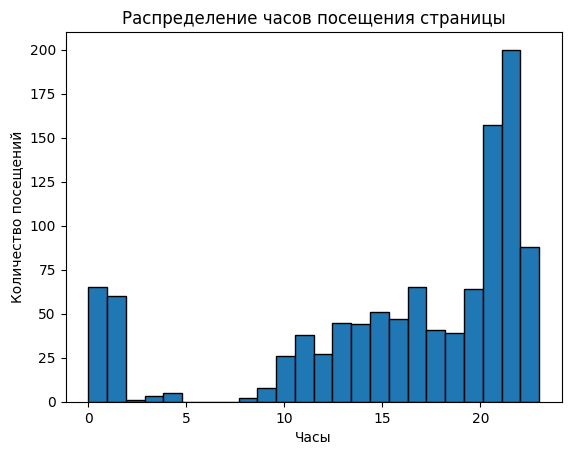

In [36]:
import matplotlib.pyplot as plt

data = views['hour']

plt.hist(data, bins=24, edgecolor='black',)
plt.title('Распределение часов посещения страницы')
plt.xlabel('Часы')
plt.ylabel('Количество посещений')
plt.show()